In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Flatten
import cv2
import pathlib
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tqdm import tqdm

In [39]:
def increase_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=50., tileGridSize=(8,8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))  # merge channels
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    return img 

def Preprocessing(image):
    matrix=[]
    image=cv2.imread(r"%s"%image)
    image=increase_contrast(cv2.cvtColor(image, cv2.COLOR_BGR2HLS))
    for k in range(len(image)-1):
        matrix.append(np.round(np.array([image[k][k],image[k][k+1],image[k+1][k],image[k+1][k+1]]).mean()))
    return matrix


In [40]:
model=Sequential()
model.add(Dense(2048, input_shape=(127,), activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(500, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
X=[]
y=[]
for path in pathlib.Path(r"C:\Users\33649\Documents\ROI Database\NIR").iterdir():
    for path2 in pathlib.Path(path).iterdir():
        X.append(Preprocessing(path2))
        matrix=np.zeros((500,)) ;matrix[int(str(path).split("\\")[-1])-1] = 1
        y.append(matrix)

In [42]:
early_stopping=EarlyStopping(monitor='val_accuracy', patience=25)
#modelcheckpoint=ModelCheckpoint('out/other_identification_model.hdf5', monitor='val_accuracy', save_best_only=True)

X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train.shape

(5940, 127)

In [43]:
h=model.fit(X, y, epochs=50, validation_data=(X_test, y_test),callbacks=[early_stopping], verbose=1)
print("Done")

Epoch 1/50
188/188 [==============================] - 7s 33ms/step - loss: 11.6142 - accuracy: 0.1277 - val_loss: 2.2796 - val_accuracy: 0.4833
Epoch 2/50
188/188 [==============================] - 6s 33ms/step - loss: 1.6497 - accuracy: 0.5973 - val_loss: 0.8524 - val_accuracy: 0.7167
Epoch 3/50
188/188 [==============================] - 6s 34ms/step - loss: 0.9275 - accuracy: 0.7577 - val_loss: 0.4343 - val_accuracy: 0.8833
Epoch 4/50
188/188 [==============================] - 6s 33ms/step - loss: 0.6725 - accuracy: 0.8205 - val_loss: 0.3054 - val_accuracy: 0.9000
Epoch 5/50
188/188 [==============================] - 6s 32ms/step - loss: 0.4946 - accuracy: 0.8545 - val_loss: 0.3273 - val_accuracy: 0.9000
Epoch 6/50
188/188 [==============================] - 6s 32ms/step - loss: 0.4250 - accuracy: 0.8775 - val_loss: 0.5235 - val_accuracy: 0.8167
Epoch 7/50
188/188 [==============================] - 6s 32ms/step - loss: 0.4517 - accuracy: 0.8695 - val_loss: 0.1530 - val_accuracy: 0.916

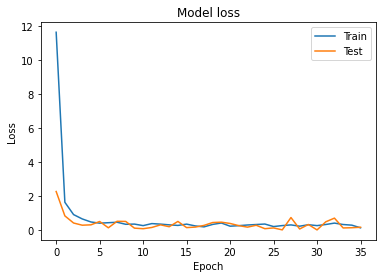

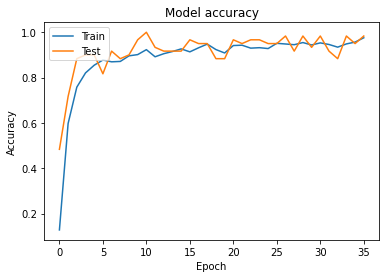

model accuracy :  0.9833


In [45]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(h.history['loss'], h.history['val_loss'])
plot_accuracy(h.history['accuracy'], h.history['val_accuracy'])
print('model accuracy : ', np.round(model.evaluate(X_test, y_test, verbose=0)[1],4))

In [48]:
compt=0
for k in range(150):
    #print(list(np.round(model.predict(X_test,verbose=0)[k])).index(1),list(y_test[k]).index(1))
    if list(np.round(model.predict(X,verbose=0)[k])).index(1)==list(y[k]).index(1):
        compt+=1
compt

145

In [49]:
test=[]
path=r"C:\Users\33649\Documents\ROI Database\NIR\0398\1_05_s.jpg"
test.append(Preprocessing(path))
list(np.round(model.predict(np.array(test),verbose=0)[0])).index(1)+1

398

In [56]:
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

best_model=load_model('out/best_identification_model.hdf5')

test=[]
path=r"C:\Users\33649\Documents\ROI Database\NIR\0456\1_04_s.jpg"
test.append(Preprocessing(path))

print("C'est la personne n°", list(np.round(best_model.predict(np.array(test),verbose=0)[0])).index(1)+1)

C'est la personne n° 456


In [50]:
best_model.get_weights()

NameError: name 'best_model' is not defined

In [7]:
msg=""
for path in pathlib.Path(r"C:\Program Files (x86)\Microsoft Visual Studio\OpenCV450-VS2019x64\lib").iterdir():
    msg+=(str(path).split("\\")[-1])+";"
msg

'ade.lib;opencv_aruco450.lib;opencv_bgsegm450.lib;opencv_bioinspired450.lib;opencv_calib3d450.lib;opencv_ccalib450.lib;opencv_core450.lib;opencv_datasets450.lib;opencv_dnn450.lib;opencv_dnn_objdetect450.lib;opencv_dnn_superres450.lib;opencv_dpm450.lib;opencv_face450.lib;opencv_features2d450.lib;opencv_flann450.lib;opencv_fuzzy450.lib;opencv_gapi450.lib;opencv_hfs450.lib;opencv_highgui450.lib;opencv_imgcodecs450.lib;opencv_imgproc450.lib;opencv_img_hash450.lib;opencv_intensity_transform450.lib;opencv_line_descriptor450.lib;opencv_mcc450.lib;opencv_ml450.lib;opencv_objdetect450.lib;opencv_optflow450.lib;opencv_phase_unwrapping450.lib;opencv_photo450.lib;opencv_plot450.lib;opencv_quality450.lib;opencv_rapid450.lib;opencv_reg450.lib;opencv_rgbd450.lib;opencv_saliency450.lib;opencv_shape450.lib;opencv_stereo450.lib;opencv_stitching450.lib;opencv_structured_light450.lib;opencv_superres450.lib;opencv_surface_matching450.lib;opencv_text450.lib;opencv_tracking450.lib;opencv_ts450.lib;opencv_vid

In [2]:
import warnings
warnings.warn("Fuck off")

C:\Users\33649\AppData\Local\Temp\ipykernel_12120\2025129741.py:2: UserWarning: Fuck off
  warnings.warn("Fuck off")
